In [148]:
import os
import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [149]:
current_dir = os.getcwd()
project_root = os.path.dirname(current_dir)
data_dir = os.path.join(project_root, "data")

file_path = os.path.join(data_dir, "adult.csv")

df = pd.read_csv(file_path)
df.replace("?", pd.NA, inplace=True)
df_cleaned = df.dropna()
unique_values_salary = df_cleaned["salary"].unique()
unique_values_salary_k = df_cleaned["salary K$"].unique()
df.head(10)

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25
5,5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K,44
6,6,49,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K,49
7,7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
8,8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K,330
9,9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K,303


# Task 1
Print the count of men and women in the dataset.

In [150]:
df_sex_counts = df_cleaned.value_counts("sex").reset_index(name="count")
print(df_sex_counts)

      sex  count
0    Male  20380
1  Female   9782


# Task 2
Find the average age of men in dataset

In [151]:
average_age_men = int(df_cleaned[df_cleaned["sex"] == "Male"]["age"].mean())
print(f"The average age of men is {average_age_men} years.")

The average age of men is 39 years.


# Task 3
Get the percentage of people from Poland (native-country)

In [152]:
per_people_from_poland = (df_cleaned[df_cleaned["native-country"] == "Poland"].shape[0] / df_cleaned.shape[0]) * 100
print("Percentage of people from Poland: {:.2f}%".format(per_people_from_poland))

Percentage of people from Poland: 0.19%


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [153]:
mean_age_high_income = int(df_cleaned[df_cleaned['salary'] == '>50K']['age'].mean())
std_age_high_income = int(df_cleaned[df_cleaned['salary'] == '>50K']['age'].std())
print(f"The mean of the age for people who earn > 50K: {mean_age_high_income} years.")
print(f"The standard deviation of the age for people who earn > 50K: {std_age_high_income} years.")
mean_age_lower_income = int(df_cleaned[df_cleaned['salary'] == '<=50K']['age'].mean())
std_age_lower_income = int(df_cleaned[df_cleaned['salary'] == '<=50K']['age'].std())
print(f"The mean of the age for people who earn <=50K: {mean_age_lower_income} years.")
print(f"The standard deviation of the age for people who earn <=50K: {std_age_lower_income} years.")

The mean of the age for people who earn > 50K: 43 years.
The standard deviation of the age for people who earn > 50K: 10 years.
The mean of the age for people who earn <=50K: 36 years.
The standard deviation of the age for people who earn <=50K: 13 years.


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [154]:
people_without_education = df_cleaned[~df_cleaned["education"].isin(["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]) & (df_cleaned["salary"] == ">50K")]
print(f"The number of people without a higher education, but with a salary > 50,000 : {people_without_education.shape[0]}.")

The number of people without a higher education, but with a salary > 50,000 : 3178.


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [155]:
education_age_stats = df_cleaned.groupby('education')['age'].describe()
print(education_age_stats)

               count       mean        std   min   25%   50%   75%   max
education                                                               
10th           820.0  37.897561  16.225795  17.0  23.0  36.0  52.0  90.0
11th          1048.0  32.363550  15.089307  17.0  18.0  28.5  43.0  90.0
12th           377.0  32.013263  14.373710  17.0  19.0  28.0  41.0  79.0
1st-4th        151.0  44.622517  14.929051  19.0  33.0  44.0  56.0  81.0
5th-6th        288.0  41.649306  14.754622  17.0  28.0  41.0  53.0  82.0
7th-8th        557.0  47.631957  15.737479  17.0  34.0  49.0  60.0  90.0
9th            455.0  40.303297  15.335754  17.0  28.0  38.0  53.0  90.0
Assoc-acdm    1008.0  37.286706  10.509755  19.0  29.0  36.0  44.0  90.0
Assoc-voc     1307.0  38.246366  11.181253  19.0  30.0  37.0  45.0  84.0
Bachelors     5044.0  38.641554  11.577566  19.0  29.0  37.0  46.0  90.0
Doctorate      375.0  47.130667  11.471727  24.0  39.0  47.0  54.0  80.0
HS-grad       9840.0  38.640955  13.067730  17.0  2

# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [156]:
df_cleaned.loc[:, 'marital_category'] = df_cleaned['marital-status'].apply(lambda x: 'Married' if x.startswith('Married') else 'Not Married')
salary_comparison = df_cleaned.groupby(['marital_category', 'sex', 'salary'])['age'].count().unstack(fill_value=0)
print(salary_comparison)

salary                   <=50K  >50K
marital_category sex                
Married          Female    964   717
                 Male     7052  5723
Not Married      Female   7706   395
                 Male     6932   673


C:\Users\Микита\AppData\Local\Temp\ipykernel_5156\526730349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, 'marital_category'] = df_cleaned['marital-status'].apply(lambda x: 'Married' if x.startswith('Married') else 'Not Married')


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [157]:
max_hours_per_week = df_cleaned['hours-per-week'].max()
people_with_max_hours = df_cleaned[df_cleaned['hours-per-week'] == max_hours_per_week]

print("Maximum hours per week:", max_hours_per_week)
print("Number of people working the same hours:", len(people_with_max_hours))


Maximum hours per week: 99
Number of people working the same hours: 78


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight their connection.

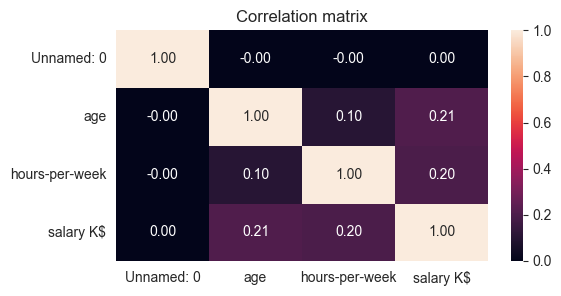

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0)
plt.title('Correlation matrix')

# Display the plot
plt.show()